This code will read a csv file and use the coordinates of the csv file to automatically search for path, row, and the best date to read the Landsat and Sentinel pixel values to a table. Cloud mask will also be considered.

In [1]:
import ee
import geemap
import geemap as emap
Map = emap.Map(center=[40,-100], zoom=4)
Map.add_basemap('SATELLITE') # Add Google Map
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

The script will try to sample image values from one of the datasets: Landsat 5,7,8 and Sentinel-2 that is cloud free and is the closest to the day of field sample. 
Goal: Give a location and time, try to search through all the datasets to see which provides the best data with cloud free and closest overpassing time. Parameter is the time window (1-7 days). If the parameter is not satified by all images, the points will be excluded from the output list
The logic is: First, check if the image is available from Sentinel, LC8, LE7, and LT5 by the order. If sentienel data is avaiable, check if the cloud cover is satisfied. If everything is ok, go write the data to output. If not, try a different day and search again, untilt the time is outside the window. 

In [5]:
#this cell reads data from csv
import pandas as pd
import datetime
locations = pd.read_csv("USACE_samples.csv")
#locations = pd.read_csv("USACE_samples.csv")
locations.head()

,Lakes,Path,Row,Lat,Lon,Landsat 8 Overpass,WaterSampleDate,Chl-a,id
0,Jericho,21,33,38.445300,-85.281400,5/1/2013,5/2/2013,19.23,0
1,Jericho,21,33,38.445300,-85.281400,8/5/2013,8/6/2013,20.17,1
2,Barren River,21,34,36.811389,-86.070000,8/27/2015,8/20/2015,6.90,2
3,Barren River,21,34,36.897778,-86.099722,8/27/2015,8/20/2015,7.90,3
4,Barren River,21,34,36.874806,-86.065500,8/27/2015,8/20/2015,9.40,4


Check the head to determin the column numbers for 
***lat, lon, and time*** 

In [6]:
lat = 4
lon = 5
day = 7

In [7]:
from Search_all import *
delta = datetime.timedelta(days = 2)
cloud = 'yes'
#ft = Search(ee,locations,delta,'yes','Sentinel',sentinel2Availability,SampleSentinelImage,13,14,4)
#ft = Search_pixel(ee,locations,delta,'yes','Landsat 8',Landsat8Availability,SampleLC08Image,13,14,4)        
ft=Search_pixel(ee,locations,delta,'yes','Landsat 7',Landsat7Availability,SampleLT57Image,lat,lon,day)

row number 0
Found a Landsat 7 image for date: 2013-05-02 00:00:00  at date: 05/02/2013
row: 1
No image was found, skipped
row: 2
No image was found, skipped
row: 3
No image was found, skipped
row: 4
No image was found, skipped
row: 5
No image was found, skipped
row: 6
No image was found, skipped
row: 7
No image was found, skipped
row: 8
No image was found, skipped
row: 9
Found a Landsat 7 image for date: 2017-09-27 00:00:00  at date: 09/25/2017
row: 10
Found a Landsat 7 image for date: 2017-09-27 00:00:00  at date: 09/25/2017
row: 11
No image was found, skipped
row: 12
Found a Landsat 7 image for date: 2017-09-27 00:00:00  at date: 09/25/2017
row: 13
Found a Landsat 7 image for date: 2017-09-27 00:00:00  at date: 09/25/2017
row: 14
Found a Landsat 7 image for date: 2017-09-27 00:00:00  at date: 09/25/2017
row: 15
Found a Landsat 7 image for date: 2017-09-27 00:00:00  at date: 09/25/2017
row: 16
Found a Landsat 7 image for date: 2017-05-31 00:00:00  at date: 05/29/2017
row: 17
No image

Export the feature collection to csv format in Google Drive

In [ ]:
task = ee.batch.Export.table.toDrive(ft,
"GEE_matchup",
"gee_data",
"usace_ETM_2day")
task.start()

In [ ]:
task.status()

In [19]:
print(ee.Array(ft.flatten().toList(100)))

ee.Array({
  "functionInvocationValue": {
    "functionName": "Array",
    "arguments": {
      "values": {
        "functionInvocationValue": {
          "functionName": "Collection.toList",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.flatten",
                "arguments": {
                  "collection": {
                    "functionInvocationValue": {
                      "functionName": "Collection.merge",
                      "arguments": {
                        "collection1": {
                          "functionInvocationValue": {
                            "functionName": "Collection.merge",
                            "arguments": {
                              "collection1": {
                                "functionInvocationValue": {
                                  "functionName": "Collection.merge",
                                  "arguments": {
                   

system:index	B1	B10	B11	B2	B3	B4	B5	B6	B7	date	pixel_qa	radsat_qa	sr_aerosol	.geo
2_0	254	2961	2944	278	477	325	3030	1574	790	2017-09-10T16:17:27	322	0	96	{"type":"Point","coordinates":[-84.626684,38.902148]}
2_1	254	2961	2944	278	477	325	3030	1574	790	2017-09-10T16:17:27	322	0	96	{"type":"Point","coordinates":[-84.626684,38.902148]}
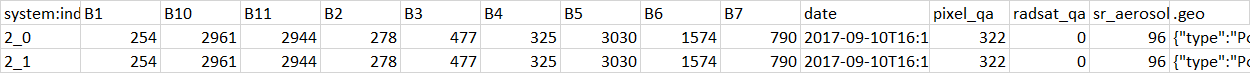